In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlresearch.utils import set_matplotlib_style
from recgame.environments import BaseEnvironment
from recgame.recourse import NFeatureRecourse
from recgame.utils import generate_synthetic_data

set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
# TODO: K -> number of people or an array for each time step
THRESHOLD = 0.8
ADAPTATION = 0.2
# TODO: Fixed number (absolute) or an array for each time step
GROWTH_RATE = 0.2

# TODO: threshold drift metric
# TODO: population size visualization
# TODO: end and stop from updating when population becomes too small

In [3]:
def data_source_func(n_agents):
    X, _, _ = generate_synthetic_data(
        n_agents=n_agents,
        n_continuous=N_CONTINUOUS,
        n_categorical=N_CAT,
    )
    return X

In [4]:
# Generate data and fit regression
df, y, categorical = generate_synthetic_data(
    n_agents=N_AGENTS,
    n_continuous=N_CONTINUOUS,
    n_categorical=N_CAT,
    random_state=RNG_SEED,
)

lr = LogisticRegression().fit(df, y)

(array([ 2.,  3., 13., 18., 16., 20., 17.,  5.,  3.,  3.]),
 array([0.31059223, 0.35146955, 0.39234686, 0.43322417, 0.47410149,
        0.5149788 , 0.55585612, 0.59673343, 0.63761074, 0.67848806,
        0.71936537]),
 <BarContainer object of 10 artists>)

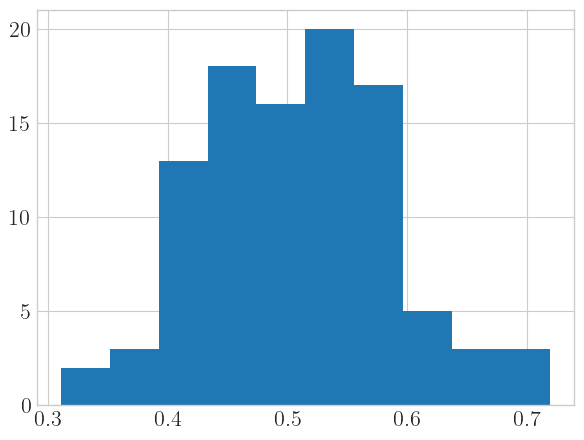

In [5]:
plt.hist(lr.predict_proba(df)[:, -1])

In [6]:
# Define the necessary components to run simulation
recourse = NFeatureRecourse(lr, n_features=2, categorical=categorical)
environment = BaseEnvironment(
    X=df,
    recourse=recourse,
    data_source_func=data_source_func,
    threshold=THRESHOLD,
    threshold_type="relative",
    adaptation=ADAPTATION,
    behavior_function="binary_constant",
    growth_rate=GROWTH_RATE,
    random_state=RNG_SEED,
)

environment.simulate(20)

BaseEnvironment(X=         f_0       f_1
0   0.601572  0.153339
1   0.750150  0.813522
2  -0.150345  0.065940
3   0.542613  0.394586
4   0.494400  0.215652
..       ...       ...
95  1.074555  0.440160
96  0.372271  0.987148
97  0.130985  0.201758
98  0.714442  0.368465
99  0.498293  0.445519

[100 rows x 2 columns],
                adaptation=0.2, behavior_function='binary_constant',
                data_source_func=<function data_source_func at 0x7f1dc35463b0>,
                growth_rate=0.2, random_state=42,
                recourse=NFeatureRecourse(categorical=[],
                                          model=LogisticRegression(),
                                          n_features=2,
                                          threshold=0.5539650272185769),
                threshold=0.8, threshold_type='relative')

In [7]:
environment.metadata_[1]["score"]

1      0.519861
2      0.584826
3      0.537543
4      0.555235
5      0.584826
         ...   
115    0.529564
116    0.496072
117    0.451379
118    0.535216
119    0.673744
Length: 100, dtype: float64

In [8]:
environment.metadata_[1].keys()

dict_keys(['X', 'effort', 'outcome', 'score', 'threshold', 'growth_k', 'threshold_index'])

<Axes: title={'center': 'Population scores over 21 time steps'}, xlabel='Step', ylabel='Score'>

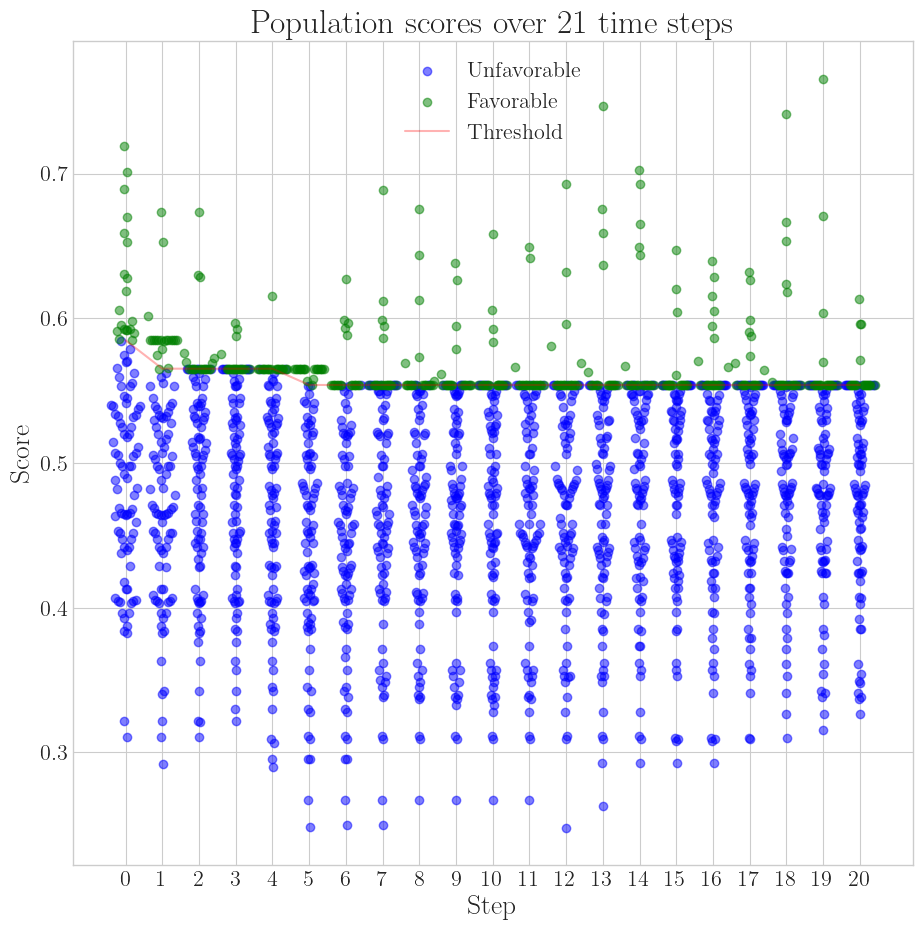

In [9]:
environment.plot.agent_scores()

<Axes: title={'center': 'Population at t=1'}, xlabel='f_0', ylabel='f_1'>

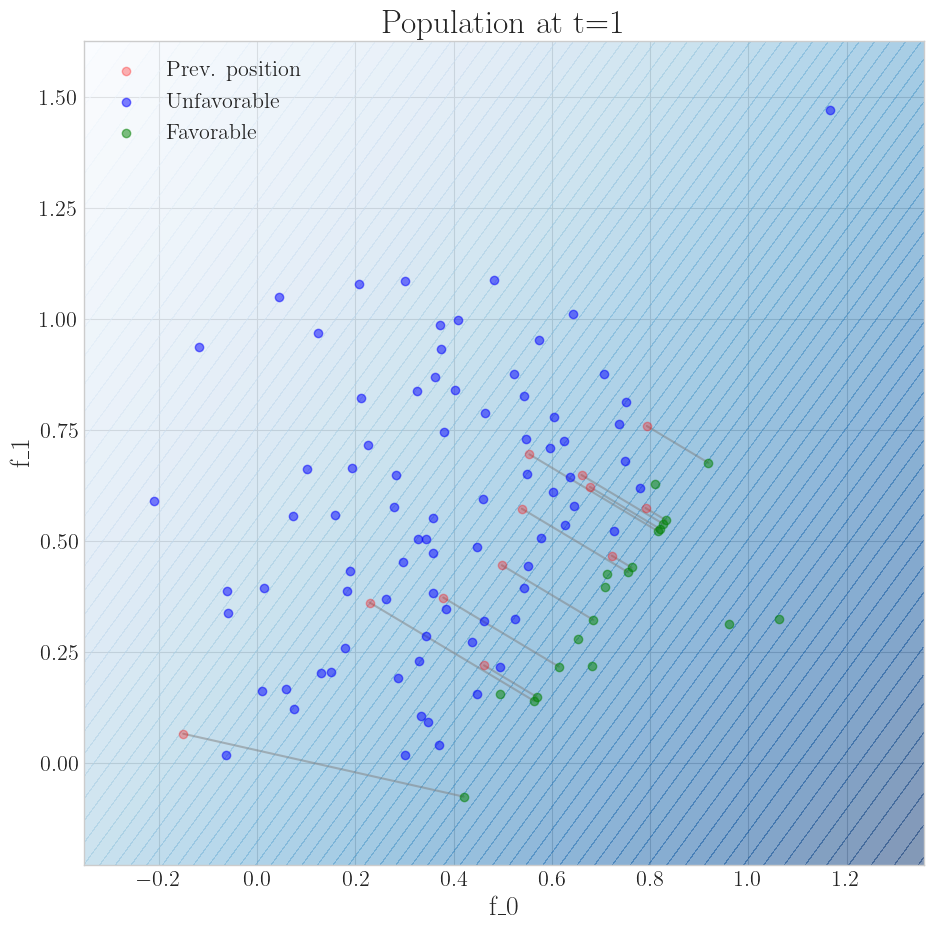

In [10]:
# environment.plot.scatter(1)
environment.plot.scatter(1)

<Axes: title={'center': 'Population size over 21 time steps'}, xlabel='Step', ylabel='Number of agents'>

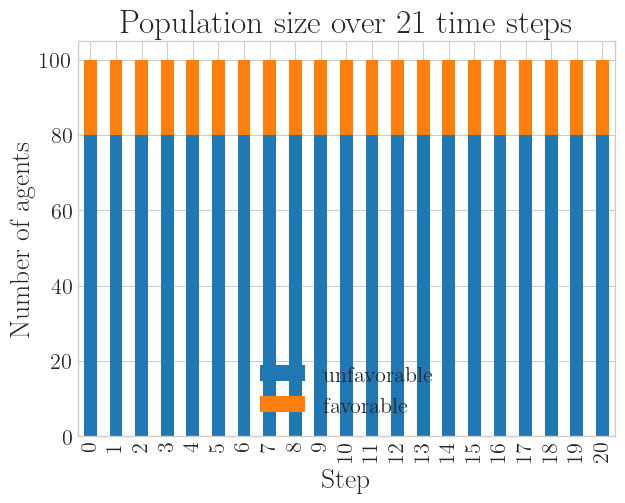

In [11]:
environment.plot.population_size()

# Additional Features

In [12]:
# A simple performance metric
environment.analysis.success_rate(1, 11)

array([1.        , 0.65      , 0.61111111, 1.        , 1.        ,
       0.9375    , 0.58333333, 0.75      , 0.70588235, 0.72222222])

(array([ 2.,  3., 13., 18., 16., 20., 17.,  5.,  3.,  3.]),
 array([0.31059223, 0.35146955, 0.39234686, 0.43322417, 0.47410149,
        0.5149788 , 0.55585612, 0.59673343, 0.63761074, 0.67848806,
        0.71936537]),
 <BarContainer object of 10 artists>)

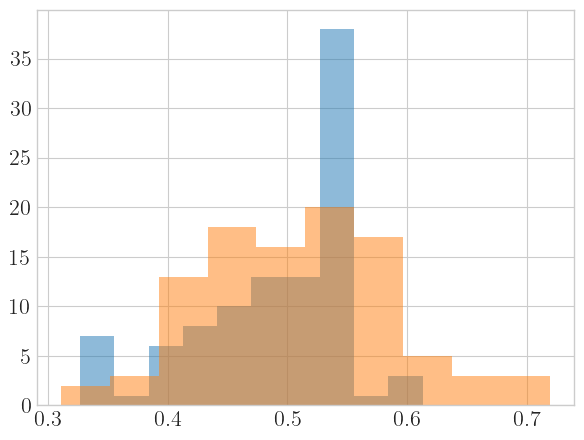

In [13]:
# Histogram with score distribution
environment.plot.scores_histogram(alpha=0.5)
environment.plot.scores_histogram(0, alpha=0.5)

<Axes: ylabel='Density'>

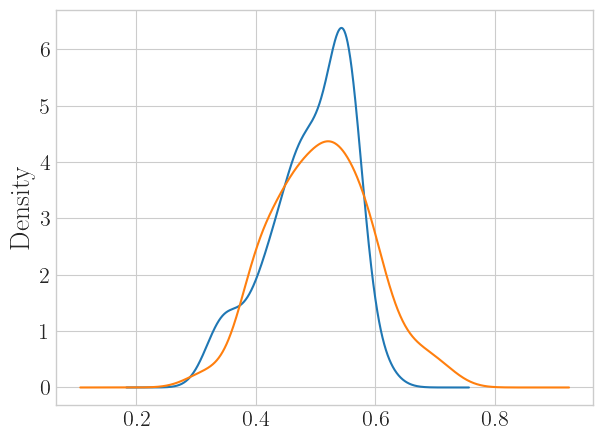

In [14]:
# KDE with score distribution
environment.plot.scores_kde()
environment.plot.scores_kde(0)

In [16]:
for i, meta in environment.metadata_.items():
    print(i, "\t", meta["X"].shape[0])

0 	 100
1 	 100
2 	 100
3 	 100
4 	 100
5 	 100
6 	 100
7 	 100
8 	 100
9 	 100
10 	 100
11 	 100
12 	 100
13 	 100
14 	 100
15 	 100
16 	 100
17 	 100
18 	 100
19 	 100
20 	 100


In [17]:
[meta["threshold"] for meta in environment.metadata_.values()]

[0.5848259831074815,
 0.565221317442906,
 0.565221317442906,
 0.565221317442906,
 0.565221317442906,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769,
 0.5539650272185769]